# PROJECT: Wrangling and Analyzing Data
by: Aniugbo Queen-Esther

## Data Gathering act
In this analysis, I'll gather three pieces of data from different sources which will be a csv file, tsv file and one from the tweepy libary

~First i'll import all the libaries i will need for this analysis

In [180]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import requests
import tweepy
from tweepy import OAuthHandler
import json
import time
import os
from timeit import default_timer as timer
%matplotlib inline
print('setup complete')

setup complete


1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) and Loading the twitter-archive-enhanced.csv file as twitter_arch

In [181]:
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

2.Using the request libary to download image-predictions.tsv file

In [182]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [183]:
image_pred = pd.read_csv('image-predictions.tsv', sep='\t')

3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [184]:
tweets_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        tweets_list.append(data)

In [185]:
#To read in the data
df3 = pd.DataFrame(tweets_list, columns=['id', 'retweet_count', 'favorite_count'])

# Assesssing Data

### Visual Assessment

In [186]:
twitter_arch.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1607,685663452032069632,NaN,NaN,2016-01-09 03:24:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brooks. He's confused by the almighty bal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685663452...,12,10,Brooks,None,None,None,None
871,761599872357261312,NaN,NaN,2016-08-05 16:28:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Sephie. According to this picture, she...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/761599872...,11,10,Sephie,None,None,None,None
1766,678399652199309312,NaN,NaN,2015-12-20 02:20:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This made my day. 12/10 please enjoy https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678399652...,12,10,None,None,None,None,None


### There are columns that have missing data and will be dropped
The columns that will be dropped are in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

In [187]:
twitter_arch['timestamp'].sample()

1086    2016-06-02 00:32:39 +0000
Name: timestamp, dtype: object

The timestamp column will be converted to datetime datatype

In [188]:
twitter_arch['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Clean the rows to extract the text from the anchor tag

In [189]:
twitter_arch[['doggo','floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64

Combine the four dogs stages into one column

In [190]:
image_pred.sample(9)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
629,680913438424612864,https://pbs.twimg.com/media/CXMXKKHUMAA1QN3.jpg,1,Pomeranian,0.615678,True,golden_retriever,0.126455,True,Chihuahua,0.087184,True
1025,710658690886586372,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True
234,670421925039075328,https://pbs.twimg.com/media/CU3RLqfW4AE0pbA.jpg,1,Chihuahua,0.275793,True,corn,0.073596,False,bolete,0.054905,False
60,667138269671505920,https://pbs.twimg.com/media/CUImtzEVAAAZNJo.jpg,1,West_Highland_white_terrier,0.747713,True,Samoyed,0.243629,True,toy_poodle,0.001804,True
1772,827933404142436356,https://pbs.twimg.com/media/C31pCN4UcAAOLNH.jpg,2,German_shepherd,0.806115,True,Tibetan_mastiff,0.104831,True,kelpie,0.038148,True
690,684195085588783105,https://pbs.twimg.com/media/CX6_y6OU0AAl3v2.jpg,1,Chihuahua,0.379365,True,toy_terrier,0.121809,True,Boston_bull,0.095981,True
1672,813112105746448384,https://pbs.twimg.com/media/C0jBJZVWQAA2_-X.jpg,1,dingo,0.287369,False,Pembroke,0.140682,True,basenji,0.090819,True
2015,879492040517615616,https://pbs.twimg.com/media/DDSVWMvXsAEgmMK.jpg,1,German_short-haired_pointer,0.479896,True,vizsla,0.124353,True,bath_towel,0.073320,False
1191,739932936087216128,https://pbs.twimg.com/media/CkTFEe-W0AA90m1.jpg,1,redbone,0.243904,True,beagle,0.210975,True,vizsla,0.076443,True


The names of dogs in columns p1, p2, and p3 have both uppercase and lowercase letters

In [191]:
df3.sample(10)

,id,retweet_count,favorite_count
1447,696100768806522880,750,2125
480,815639385530101762,1918,9161
1852,675534494439489536,470,1953
1717,680161097740095489,828,2538
2178,669000397445533696,6965,22118
1778,677700003327029250,1622,3689
1258,710269109699739648,1257,2613
906,757729163776290825,9299,0
1897,674670581682434048,729,1751
1180,718971898235854848,1231,3818


Will have to change the id column to tweet id

In [192]:
df3.shape

(2354, 3)

### Progammatical Assessment

~Now i'll be identifying the tidyness and quality issues using programatic assessment

In [193]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [194]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [195]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Quality
<ul>
    <li>Identifing reply and retweet and drop them</li>
    <li>Missing values in columns will dropped</li>
    <li>Timestamp should be in datetime datatype</li>
    <li>The source column in twitter archive includes some of html code</li>
<li>Extract numerator content from text column</li>
<li>The names of dogs in columns p1, p2, and p3 have both uppercase and lowercase letters in the image prediction table</li>
<li>Drops rows with duplicates in the jpg_url column</li>
    <li>Rename id in the tweets df as tweets_id</li>

### Tidiness
   <ul>
    <li>Doggo, Floofer, Pupper and Puppo should be in one row</li>
    <li>Join 'tweet_info' and 'image_predictions' to 'twitter_archive'</li>

## Cleaning Data

Making a copy of the original data before cleaning

In [196]:
arch_df=twitter_arch.copy()
prediction_df=image_pred.copy()
json_df=df3.copy()

## Quality

### def: Identifing reply and retweet and drop them

### code

In [197]:
#Creating a function to drop rows and columns
def drop_row_col(dframe, row_col, axis=0):
    dframe.drop(row_col, axis=axis, inplace=True)


In [198]:
reply_id = twitter_arch[pd.notnull(twitter_arch['in_reply_to_user_id'])].index
drop_row_col(twitter_arch, reply_id)

In [199]:
retweet_id = twitter_arch[pd.notnull(twitter_arch['retweeted_status_user_id'])].index
drop_row_col(twitter_arch, retweet_id)

### Test

In [200]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### def: Missing values in Columns

### code

In [201]:
#Taking out the empty columns
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp']
drop_row_col(twitter_arch, columns, axis=1)

### Test

In [202]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### def: timestamp should be in datetime datatype

### code

In [203]:
#Converting timestamp datatype to datatime
twitter_arch['timestamp'] = pd.to_datetime(twitter_arch['timestamp'])

### Test

In [204]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### def: Source column includes some html code

### code

In [205]:
twitter_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [206]:
twitter_arch['source'] = twitter_arch['source'].str.extract('^<a.+>(.+)</a>$')

In [207]:
twitter_arch.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Test

In [208]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### def: extract numerator from text column

### code

In [209]:
twitter_arch['rating_numerator'] = twitter_arch['text'].str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0]

### Test

In [210]:
twitter_arch[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


### def: The names of dogs in columns p1, p2, and p3 have both uppercase and lowercase letters in the image prediction table

### code

In [211]:
image_pred['p1'] = image_pred['p1'].str.lower()
image_pred['p2'] = image_pred['p2'].str.lower()
image_pred['p3'] = image_pred['p3'].str.lower()

### Test

In [212]:
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
897,699775878809702401,https://pbs.twimg.com/media/CbYac83W4AAUH1O.jpg,1,dandie_dinmont,0.271683,True,old_english_sheepdog,0.164931,True,otterhound,0.105918,True
528,676776431406465024,https://pbs.twimg.com/ext_tw_video_thumb/67677...,1,doormat,0.201346,False,dishwasher,0.191749,False,microwave,0.038110,False
1693,816014286006976512,https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg,1,english_setter,0.677408,True,border_collie,0.052724,True,cocker_spaniel,0.048572,True
1207,742161199639494656,https://pbs.twimg.com/media/CkyvqnNWYAQxQY1.jpg,1,balloon,0.990736,False,punching_bag,0.004754,False,parachute,0.000436,False
459,674790488185167872,https://pbs.twimg.com/media/CV1WXsmWcAAgQ56.jpg,1,labrador_retriever,0.801903,True,chesapeake_bay_retriever,0.193575,True,rottweiler,0.001193,True
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
15,666099513787052032,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,1,lhasa,0.582330,True,shih-tzu,0.166192,True,dandie_dinmont,0.089688,True
1794,831309418084069378,https://pbs.twimg.com/media/C4lngK5VUAEVrNO.jpg,1,doberman,0.369389,True,kelpie,0.132449,True,labrador_retriever,0.074727,True
1039,712085617388212225,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,2,shih-tzu,0.625129,True,tibetan_terrier,0.126897,True,lhasa,0.119663,True
1742,822647212903690241,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,1,samoyed,0.416769,True,malamute,0.252706,True,kuvasz,0.157028,True


### def: Drops rows with duplicates in the jpg_url column

### code

In [213]:
image_pred.jpg_url.duplicated().sum()

66

In [214]:
image_pred = image_pred.drop_duplicates('jpg_url')

### Test

In [215]:
image_pred.jpg_url.duplicated().sum()

0

### def: rename id in the tweets df as tweets_id

### code

In [216]:
df3 = df3.rename(columns = {'id':'tweet_id'})

### Test

In [217]:
df3.sample(7)

,tweet_id,retweet_count,favorite_count
1895,674737130913071104,103,693
973,750041628174217216,703,3502
1817,676590572941893632,142,1001
2302,666983947667116034,1040,2679
510,811985624773361665,1647,8102
373,828372645993398273,3344,13756
1356,703382836347330562,1285,3837


## Tidiness

### def: Join 'tweet_info' and 'image_predictions' to 'twitter_archive'

### code

In [218]:
#combining the twitter_arch dataset with df3 using 'tweet_id' that they have in  common
combine =pd.merge(twitter_arch, df3, on = 'tweet_id', how = 'left')
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   object             
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
 12  retweet_count       2097 non-null 

In [219]:
#Merging combine data set with image_pred into one dataframe
combine_arch = pd.merge(combine, image_pred, on = 'tweet_id', how = 'inner')
combine_arch.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'retweet_count', 'favorite_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

### Test

In [220]:
combine_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   object             
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   doggo               1971 non-null   object             
 9   floofer             1971 non-null   object             
 10  pupper              1971 non-null   object             
 11  puppo               1971 non-null   object             
 12  retweet_count       1971 non-null 

In [236]:
combine_arch.shape

(1971, 22)

### def: Doggo, Floofer, Pupper and Puppo should be in one row

### code

In [221]:
#Making a list for the dog stages
dogs = ['doggo', 'puppo', 'floofer', 'pupper']

In [222]:
#creating a column in the combined dataset and replace none with nan
combine_arch[dogs] = combine_arch[dogs].replace('None', np.nan)

In [223]:
def join_all(x):
    return ','.join(x.dropna().astype(str))
combine_arch['dogs'] = combine_arch[dogs].apply(join_all, axis=1)

In [224]:
# replacing empty strings with nan
combine_arch['dogs'] = combine_arch['dogs'].replace('', np.nan)

In [225]:
#dropping the four columns doggo, puppo, floofer, pupper
drop_row_col(combine_arch, dogs, axis=1)

### Test

In [226]:
combine_arch.dogs.value_counts()

pupper           201
doggo             63
puppo             22
doggo,pupper       8
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: dogs, dtype: int64

## 4. Storing Data

In [227]:
combine_arch.to_csv('twitter_archive_master.csv', index=False)

In [228]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dogs
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,8853,39467,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,6514,33819,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,4328,25461,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,8964,42908,...,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,9774,41048,...,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,NaN


## Analyzing and Visualizing data

<ul>
    <li>Top 3 dog breeds with the highest value count</li>
    <li>correlations between favourite count and retweet count</li>
    <li>10 dogs with the highest retweet rate</li>

### 3 dog breeds with highest the value count

The breeds of dogs are classified into p1, p2, p3 respectively 

In [229]:
# Dog breed with the highest value count in p1
combine_arch.p1.value_counts()

golden_retriever      137
labrador_retriever     94
pembroke               88
chihuahua              78
pug                    54
                     ... 
nail                    1
timber_wolf             1
espresso                1
bib                     1
desktop_computer        1
Name: p1, Length: 373, dtype: int64

In [230]:
combine_arch.p2.value_counts()

labrador_retriever          95
golden_retriever            82
cardigan                    73
chihuahua                   43
chesapeake_bay_retriever    40
                            ..
screw                        1
coffee_mug                   1
sombrero                     1
handkerchief                 1
mud_turtle                   1
Name: p2, Length: 396, dtype: int64

In [231]:
combine_arch.p3.value_counts()

labrador_retriever     76
chihuahua              57
golden_retriever       45
eskimo_dog             36
kelpie                 33
                       ..
bannister               1
rotisserie              1
hand_blower             1
american_black_bear     1
partridge               1
Name: p3, Length: 403, dtype: int64

The top 5 breeds of dogs in p1, p2, p3 were the labrador_retriever, golden_retriever and chihuahua because it significantly high in all p1, p2 and p3 

### Correlation between favorite count and value count

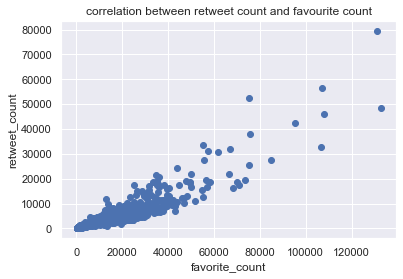

In [232]:
plt.scatter(combine_arch.favorite_count, combine_arch.retweet_count)
plt.xlabel('favorite_count');
plt.ylabel('retweet_count');
plt.title('correlation between retweet count and favourite count');

favorite count has a positive correlation with retweet count

### 10 dogs with highest retweet rate

In [233]:
# bringing out the columns needed
combine_arch[['name', 'retweet_count']].head(10)

,name,retweet_count
0,Phineas,8853
1,Tilly,6514
2,Archie,4328
3,Darla,8964
4,Franklin,9774
5,None,3261
6,Jax,2158
7,None,16716
8,Zoey,4429
9,Cassie,7711


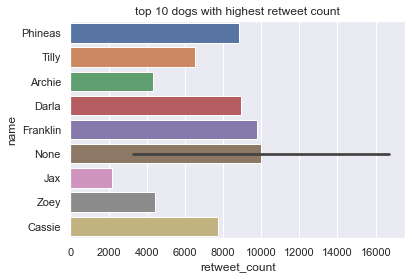

In [234]:
sns.barplot(y='name', x='retweet_count', data=combine_arch[:10]).set_title('top 10 dogs with highest retweet count');

Franklin had the highest retweet count with the value of 9774, followed by Darla with the value of 8964, who was also in close tie with Phineas with the value of 8853. A lot of dogs didn't have names.